# Visualizing Model Results

This notebook will create a timeseries of temperature at a point and a video of global surface temperature through time. 

First, import packages to re-create and visualize the model fields here:

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle
import moviepy.video.io.ImageSequenceClip
from matplotlib import gridspec

import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import seaborn as sns

Next, define the location of the run directory for the model. This is the directory that holds all of the output from the model.

In [2]:
# define the input directory
run_dir_coarse = '/home/tara/Documents/SJSU/CS_185C/model_output'
run_dir_medium = '/home/tara/Documents/SJSU/CS_185C/med_res_model_output'

#print a list of directories in the run_dir
variables = os.listdir(run_dir_medium)
variables.sort()
print(variables)

['EtaN_day_snap', 'EtaN_mon_mean', 'TS_3D_mon_mean', 'TS_surf_snap', 'atemp', 'radiation', 'vel_3D_mon_snap', 'vel_surf_mean', 'vel_surf_snap']


Then, re-create the model grid

In [3]:
delX_coarse, delY_coarse = 1, 1
delX_medium, delY_medium = 1/2,1/2

xgOrigin, ygOrigin = 0, -90  

n_cols_coarse, n_rows_coarse = 360, 180
n_cols_medium, n_rows_medium = 720, 360

xc_coarse = np.arange(xgOrigin+delX_coarse/2, xgOrigin+n_cols_coarse*delX_coarse, delX_coarse)
yc_coarse = np.arange(ygOrigin+delY_coarse/2, ygOrigin+n_rows_coarse*delY_coarse, delY_coarse)
XC_coarse, YC_coarse = np.meshgrid(xc_coarse, yc_coarse)

xc_medium = np.arange(xgOrigin+delX_medium/2, xgOrigin+n_cols_medium*delX_medium, delX_medium)
yc_medium = np.arange(ygOrigin+delY_medium/2, ygOrigin+n_rows_medium*delY_medium, delY_medium)
XC_medium, YC_medium = np.meshgrid(xc_medium, yc_medium)

## Plot a time series at a point

In [4]:
row_coarse, col_coarse = 125, 150 # Coarse grid loc
row_medium, col_medium = 250, 300 # Medium grid loc

### Set up grids

In [ ]:
vari = 'TS_surf_snap'
files_coarse = os.listdir(os.path.join(run_dir_coarse,vari))
files_coarse = [f for f in files_coarse if f.endswith('.data')]
files_coarse.sort()
print(f'{len(files_coarse)} coarse files present')

grid_coarse = np.fromfile(os.path.join(run_dir_coarse,vari,
                                files_coarse[-1]), '>f4')
grid_coarse = grid_coarse.reshape((2,n_rows_coarse,n_cols_coarse))


files_medium = os.listdir(os.path.join(run_dir_medium,vari))
files_medium = [f for f in files_medium if f.endswith('.data')]
files_medium.sort()
print(f'{len(files_medium)} medium files present')

grid_medium = np.fromfile(os.path.join(run_dir_medium,vari,
                                files_medium[-1]), '>f4')
grid_medium = grid_medium.reshape((2,n_rows_medium,n_cols_medium))

353 coarse files present
352 medium files present


### Gather the data at each timestep for both resolutions

In [7]:
timestep_numbers_coarse = []
theta_values_coarse = []
for file_name in sorted(os.listdir(os.path.join(run_dir_coarse,vari))):
    if file_name[-4:]=='data':
        # get the timestep number
        timestep_numbers_coarse.append(int(file_name.split('.')[-2]))

        grid = np.fromfile(os.path.join(run_dir_coarse,vari,
                                file_name), '>f4')
        grid = grid.reshape((2,n_rows_coarse,n_cols_coarse))
        theta_values_coarse.append(grid[0,row_coarse,col_coarse])

timestep_numbers_medium = []
theta_values_medium = []
for file_name in sorted(os.listdir(os.path.join(run_dir_medium,vari))):
    if file_name[-4:]=='data':
        # get the timestep number
        timestep_numbers_medium.append(int(file_name.split('.')[-2]))

        grid = np.fromfile(os.path.join(run_dir_medium,vari,
                                file_name), '>f4')
        grid = grid.reshape((2,n_rows_medium,n_cols_medium))
        theta_values_medium.append(grid[0,row_medium,col_medium])

## Create a movie of the global surface temperatures

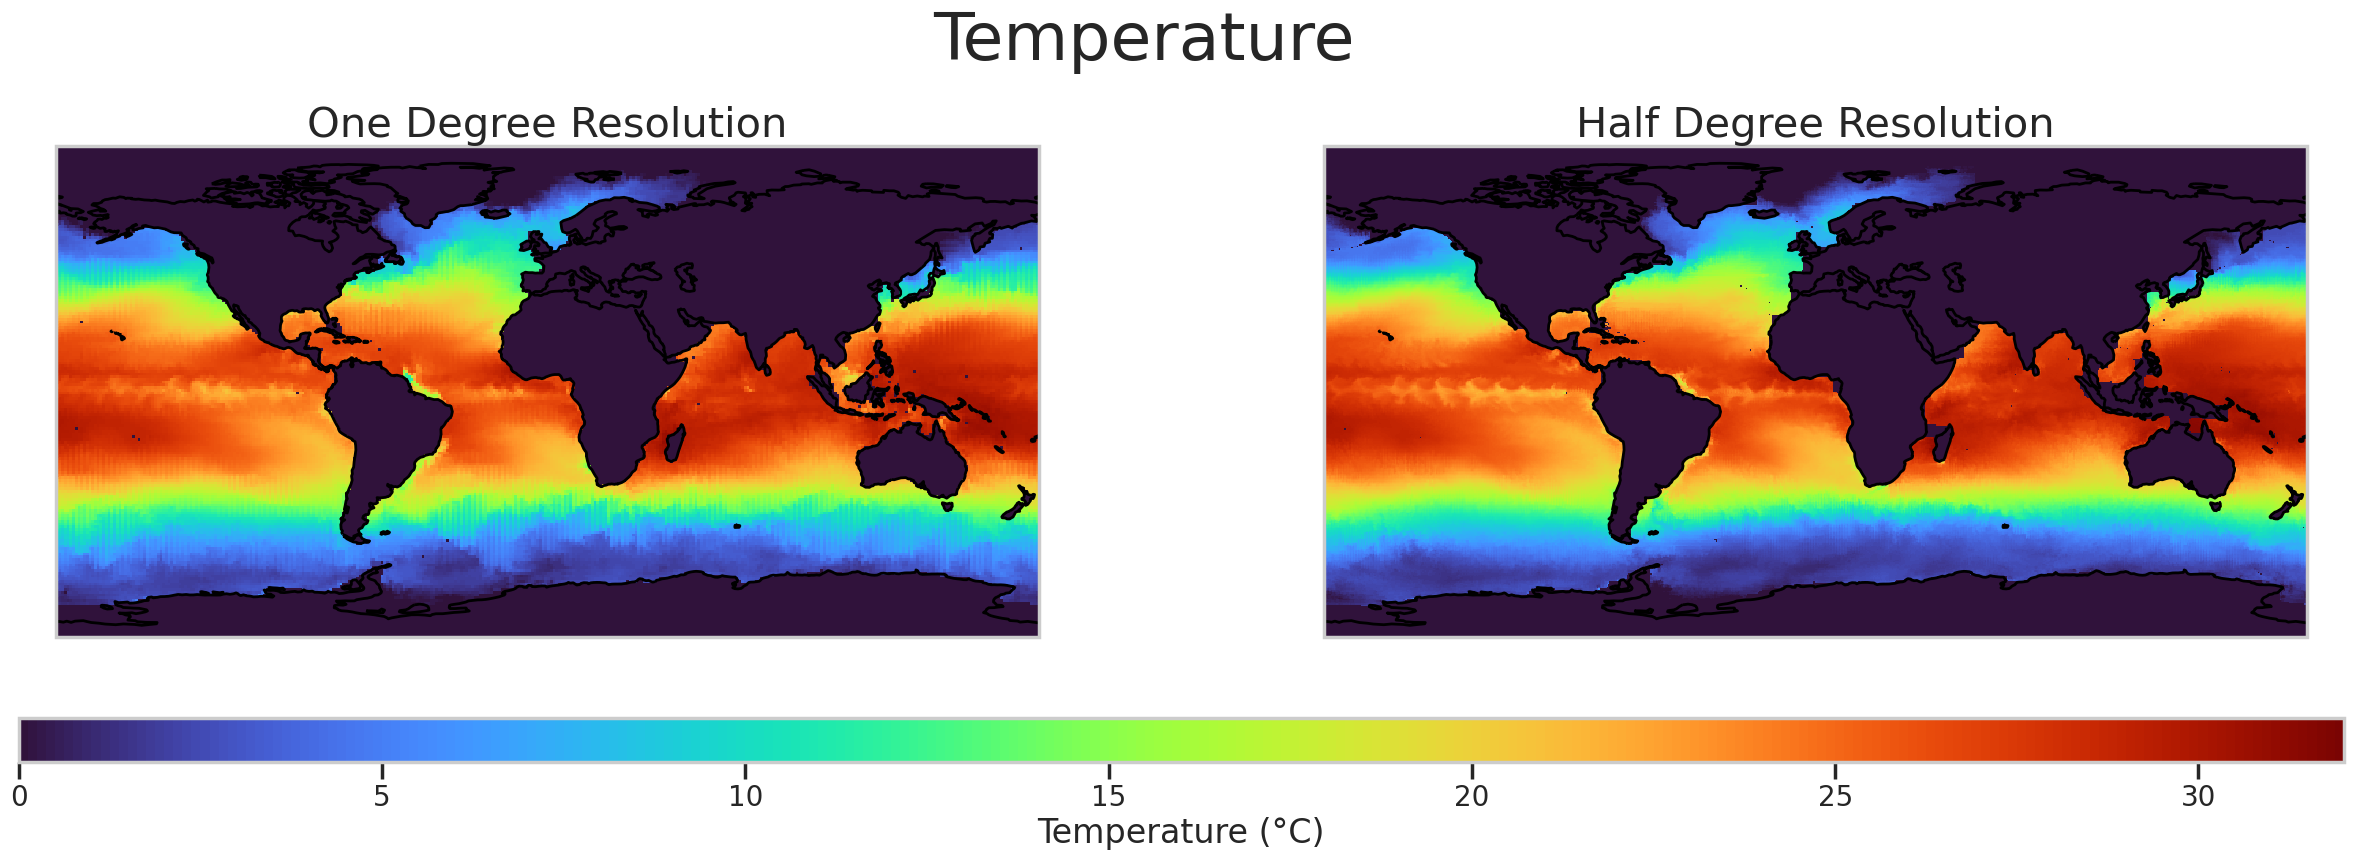

In [17]:
sns.set_context("poster")
sns.set_style("whitegrid")

# Create the figure and gridspec layout
fig = plt.figure(figsize=(30, 8))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 0.09], hspace=0.3)

# Create the axes for the subplots
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree())
cax = fig.add_subplot(gs[1, :])

# Plot the coarse grid on the left
im1 = ax1.pcolormesh(XC_coarse, YC_coarse, grid_coarse[0, :, :], cmap='turbo', vmin=0, vmax=32)
ax1.set_title('One Degree Resolution', fontsize=30)
ax1.coastlines()

# Plot the medium grid on the right
im2 = ax2.pcolormesh(XC_medium, YC_medium, grid_medium[0, :, :], cmap='turbo', vmin=0, vmax=32)
ax2.set_title('Half Degree Resolution', fontsize=30)
ax2.coastlines()

# Add a color bar spanning the second row
cbar = plt.colorbar(im1, cax=cax, orientation='horizontal')
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Temperature (°C)', fontsize=24)

# Add a super title
plt.suptitle('Temperature', fontsize=48, y=1.05)

plt.show()

## Create frames for every time step

In [14]:
sns.set_context("poster")
sns.set_style("whitegrid")

vari = 'TS_surf_snap'
files_coarse = os.listdir(os.path.join(run_dir_coarse,vari))
files_coarse = [f for f in files_coarse if f.endswith('.data')]
files_coarse.sort()
print(f'{len(files_coarse)} coarse files present')

files_medium = os.listdir(os.path.join(run_dir_medium,vari))
files_medium = [f for f in files_medium if f.endswith('.data')]
files_medium.sort()
print(f'{len(files_medium)} medium files present')

# get the min between files_medium and files_coarse
min_files = min(len(files_medium), len(files_coarse))


for i in range(min_files):
    print(f'Working on {i:04d}', end='\r')

    grid_coarse = np.fromfile(os.path.join(run_dir_coarse,vari,
                                files_coarse[i]), '>f4')
    grid_coarse = grid_coarse.reshape((2,n_rows_coarse,n_cols_coarse))

    grid_medium = np.fromfile(os.path.join(run_dir_medium,vari,
                                    files_medium[i]), '>f4')
    grid_medium = grid_medium.reshape((2,n_rows_medium,n_cols_medium))

    # Create the figure and gridspec layout
    fig = plt.figure(figsize=(30, 8))
    gs = gridspec.GridSpec(2, 2, height_ratios=[1, 0.09], hspace=0.3)

    # Create the axes for the subplots
    ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
    ax2 = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree())
    cax = fig.add_subplot(gs[1, :])

    # Plot the coarse grid on the left
    im1 = ax1.pcolormesh(XC_coarse, YC_coarse, grid_coarse[0, :, :], cmap='turbo', vmin=0, vmax=32)
    ax1.set_title('One Degree Resolution', fontsize=30)
    ax1.coastlines()

    # Plot the medium grid on the right
    im2 = ax2.pcolormesh(XC_medium, YC_medium, grid_medium[0, :, :], cmap='turbo', vmin=0, vmax=32)
    ax2.set_title('Half Degree Resolution', fontsize=30)
    ax2.coastlines()

    # Add a color bar spanning the second row
    cbar = plt.colorbar(im1, cax=cax, orientation='horizontal')
    cbar.ax.tick_params(labelsize=20)
    cbar.set_label('Temperature (°C)', fontsize=24)

    # Add a super title
    plt.suptitle('Temperature', fontsize=48) #, y=1.05)

    plt.savefig('/home/tara/Documents/SJSU/CS_185C/cs185c_fall2024/Project/frames/surface_temp_movie/frame_{:04d}.png'.format(i))
    plt.close()

353 coarse files present
352 medium files present


In [15]:
plot_dir = '/home/tara/Documents/SJSU/CS_185C/cs185c_fall2024/Project/frames/surface_temp_movie/'

panel_list = []
for file_name in sorted(os.listdir(os.path.join(plot_dir))):
    if file_name[-4:]=='.png':
        panel_list.append(os.path.join(plot_dir, file_name))
panel_list[:5]


['/home/tara/Documents/SJSU/CS_185C/cs185c_fall2024/Project/frames/surface_temp_movie/frame_0000.png',
 '/home/tara/Documents/SJSU/CS_185C/cs185c_fall2024/Project/frames/surface_temp_movie/frame_0001.png',
 '/home/tara/Documents/SJSU/CS_185C/cs185c_fall2024/Project/frames/surface_temp_movie/frame_0002.png',
 '/home/tara/Documents/SJSU/CS_185C/cs185c_fall2024/Project/frames/surface_temp_movie/frame_0003.png',
 '/home/tara/Documents/SJSU/CS_185C/cs185c_fall2024/Project/frames/surface_temp_movie/frame_0004.png']

In [16]:
movie_dir = '/home/tara/Documents/SJSU/CS_185C/cs185c_fall2024/Project/movies/'

# set the frames per second
fps=35

# use the ImageSequenceClip module to set up the clip
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(panel_list, fps=fps)

# write the video to a file
clip.write_videofile(os.path.join(movie_dir ,f'Surf Temp Compare.mp4'))

Moviepy - Building video /home/tara/Documents/SJSU/CS_185C/cs185c_fall2024/Project/movies/Surf Temp Compare.mp4.
Moviepy - Writing video /home/tara/Documents/SJSU/CS_185C/cs185c_fall2024/Project/movies/Surf Temp Compare.mp4



Moviepy - Done !
Moviepy - video ready /home/tara/Documents/SJSU/CS_185C/cs185c_fall2024/Project/movies/Surf Temp Compare.mp4


## Compare a time series of temperature at a point

Coarse grid lat, lon: 150, 35


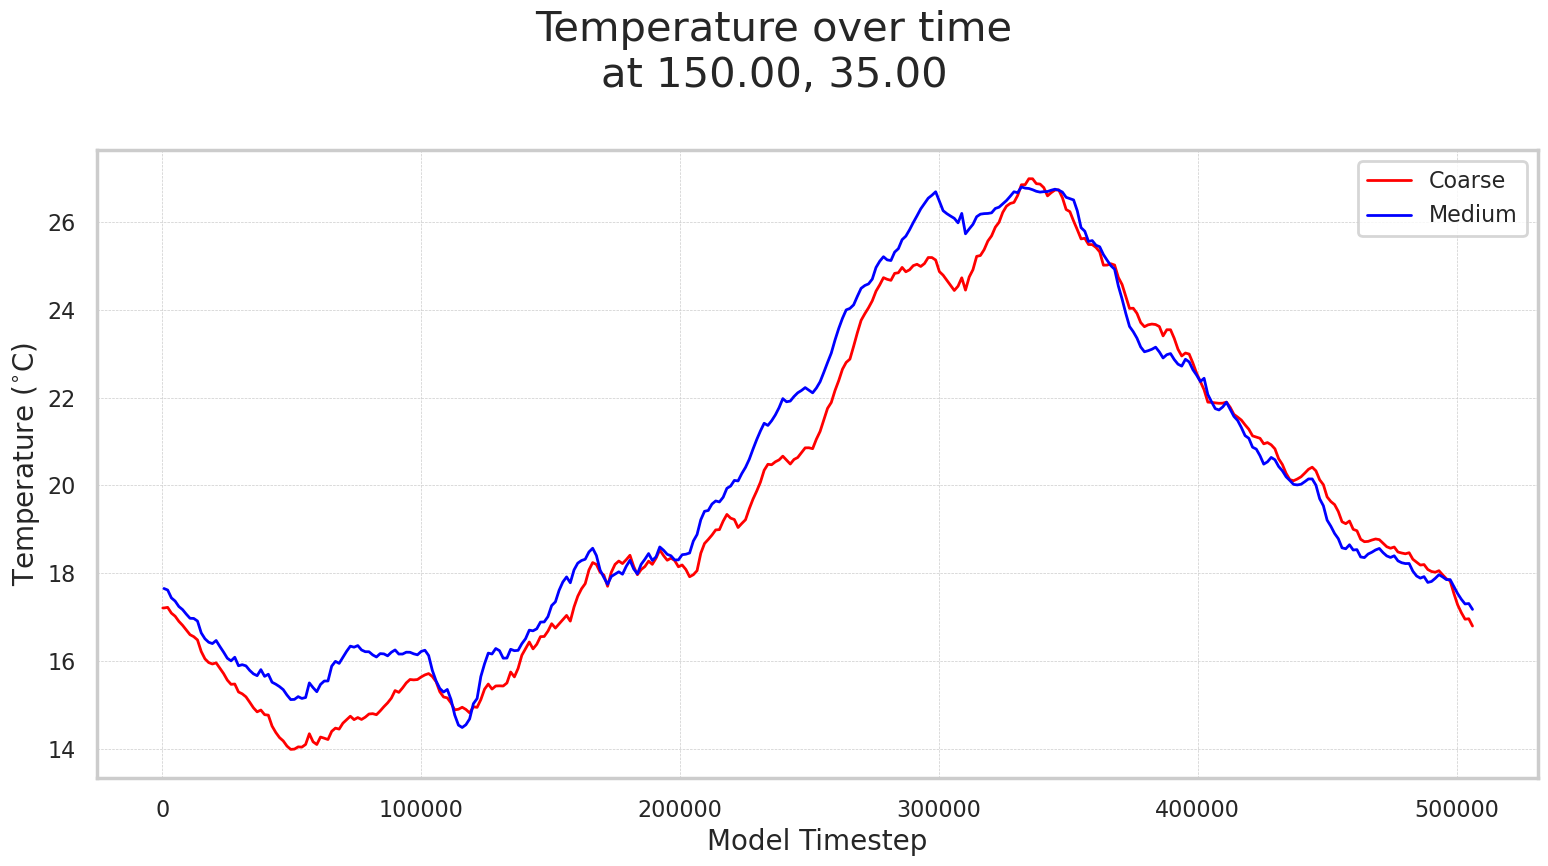

In [10]:
# get lat, lon from row, col
def get_lat_lon(row, col, delX, delY, xgOrigin, ygOrigin):
    x = xgOrigin + col*delX
    y = ygOrigin + row*delY
    return x, y

lat, lon = get_lat_lon(row_coarse, col_coarse, delX_coarse, delY_coarse, xgOrigin, ygOrigin)
print(f'Coarse grid lat, lon: {lat}, {lon}')

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 9))

# Plot the coarse data on the left
ax.plot(timestep_numbers_coarse, theta_values_coarse, 'r-', linewidth=2, label='Coarse')
ax.plot(timestep_numbers_medium, theta_values_medium, 'b-', linewidth=2, label='Medium')

# Set labels and title
ax.set_ylabel('Temperature ($^{\circ}$C)', fontsize=20)
ax.set_xlabel('Model Timestep', fontsize=20)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.legend(fontsize=16)

# Add a super title
plt.suptitle(f'Temperature over time\nat {lat:.2f}, {lon:.2f}', fontsize=30) #, y=1.05)

plt.tight_layout()
plt.show()

## Make a video of the velocity magnitude over time
A good first assessment of a model is to plot some of the output fields. Here, I'll choose one of the surface temperature fields. I'll first read in the field, and then I'll plot it

In [6]:
# folders = ['EtaN_day_snap', 'EtaN_mon_mean', 'TS_3D_mon_mean', 'TS_surf_daily_mean', 'vel_3D_mon_snap', 'vel_surf_bidaily_mean', 'radiation']
vari_coarse = 'vel_surf_snap'
vari_medium = 'vel_surf_snap'

In [7]:
files_coarse = os.listdir(os.path.join(run_dir_coarse,vari_coarse))
files_coarse = [f for f in files_coarse if f.endswith('.data')]
files_coarse.sort()
print(f'{len(files_coarse)} coarse files present')

files_medium = os.listdir(os.path.join(run_dir_medium,vari_medium))
files_medium = [f for f in files_medium if f.endswith('.data')]
files_medium.sort()
print(f'{len(files_medium)} medium files present')

# get the min between files_medium and files_coarse
min_files = min(len(files_medium), len(files_coarse))
files_coarse = files_coarse[:min_files]
files_medium = files_medium[:min_files]

2113 coarse files present
2110 medium files present


In [8]:
def plot_quiver_side_by_side(i, run_dir_coarse, run_dir_medium, vari, file_coarse, file_medium, n_rows_coarse, n_cols_coarse, n_rows_medium, n_cols_medium, XC_coarse, YC_coarse, grid_coarse, XC_medium, YC_medium, grid_medium):
    sns.set_context("poster")
    sns.set_style("whitegrid")


    data_coarse = np.fromfile(os.path.join(run_dir_coarse,vari,file_coarse), dtype='>f4')
    data_coarse = data_coarse.reshape((2, n_rows_coarse, n_cols_coarse))

    UVEL = data_coarse[0, :, :]
    VVEL = data_coarse[1, :, :]

    magnitude_coarse = np.sqrt(UVEL**2 + VVEL**2)

    scale_factor = 0.03 
    with np.errstate(invalid='ignore'):
        u_scaled_coarse = scale_factor * UVEL / np.sqrt(UVEL**2 + VVEL**2) 
        v_scaled_coarse = scale_factor * VVEL / np.sqrt(UVEL**2 + VVEL**2)
    skip = (slice(None, None, 8), slice(None, None, 8))


    data_medium = np.fromfile(os.path.join(run_dir_medium,vari,file_medium), dtype='>f4')
    data_medium = data_medium.reshape((2, n_rows_medium, n_cols_medium))

    UVEL = data_medium[0, :, :]
    VVEL = data_medium[1, :, :]

    with np.errstate(invalid='ignore'):
        u_scaled_medium = scale_factor * UVEL / np.sqrt(UVEL**2 + VVEL**2)
        v_scaled_medium = scale_factor * VVEL / np.sqrt(UVEL**2 + VVEL**2)

    magnitude_medium = np.sqrt(UVEL**2 + VVEL**2)


    # Create the figure and gridspec layout
    fig = plt.figure(figsize=(30, 8))
    gs = gridspec.GridSpec(2, 2, height_ratios=[1, 0.09], hspace=0.3)

    # Create the axes for the subplots
    ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
    ax2 = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree())
    cax = fig.add_subplot(gs[1, :])

    # Plot the coarse grid on the left
    im1 = ax1.pcolormesh(XC_coarse, YC_coarse, magnitude_coarse, cmap='Spectral_r', vmin=0, vmax=2.75, transform=ccrs.PlateCarree())
    ax1.quiver(XC_coarse[skip], YC_coarse[skip], u_scaled_coarse[skip], v_scaled_coarse[skip], color='black', scale=2.25, width=0.0015, headwidth=3.5)
    ax1.set_title('One Degree Resolution', fontsize=30)
    ax1.coastlines(linewidth=0.5)


    # Plot the medium grid on the right
    skip = (slice(None, None, 16), slice(None, None, 16))
    im2 = ax2.pcolormesh(XC_medium, YC_medium, magnitude_medium, cmap='Spectral_r', vmin=0, vmax=2.75, transform=ccrs.PlateCarree())
    ax2.quiver(XC_medium[skip], YC_medium[skip], u_scaled_medium[skip], v_scaled_medium[skip], color='black', scale=2.25, width=0.0015, headwidth=3.5)
    ax2.set_title('Half Degree Resolution', fontsize=30)
    ax2.coastlines(linewidth=0.5)

    # # Add a color bar spanning the second row
    cbar = plt.colorbar(im1, cax=cax, orientation='horizontal') 
    cbar.ax.tick_params(labelsize=20)
    cbar.set_label('Magnitude (m $s^{-1}$)', fontsize=24)

    # Add a super title
    plt.suptitle('Velocity Magnitude', fontsize=48) #, y=1.05)
    plt.savefig(f'/home/tara/Documents/SJSU/CS_185C/cs185c_fall2024/Project/frames/surface_vel_movie/frame_{i:04d}.png')

    # plt.show()
    plt.close()

for i in range(len(files_coarse)):
    print(f'{i} of {len(files_coarse)}', end='\r')
    # output_file = f'/home/tara/Documents/SJSU/CS_185C/cs185c_fall2024/Project/frames/surface_vel_movie/frame_{i:04d}.png'

    # if os.path.exists(output_file):
    #     continue
    # else:
    plot_quiver_side_by_side(i, run_dir_coarse, run_dir_medium, vari_coarse, files_coarse[i], files_medium[i], n_rows_coarse, n_cols_coarse, n_rows_medium, n_cols_medium, XC_coarse, YC_coarse, grid_coarse, XC_medium, YC_medium, grid_medium)

In [9]:
plot_dir = '/home/tara/Documents/SJSU/CS_185C/cs185c_fall2024/Project/frames/surface_vel_movie/'

panel_list = []
for file_name in sorted(os.listdir(os.path.join(plot_dir))):
    if file_name[-4:]=='.png':
        panel_list.append(os.path.join(plot_dir, file_name))
panel_list[:5]


['/home/tara/Documents/SJSU/CS_185C/cs185c_fall2024/Project/frames/surface_vel_movie/frame_0000.png',
 '/home/tara/Documents/SJSU/CS_185C/cs185c_fall2024/Project/frames/surface_vel_movie/frame_0001.png',
 '/home/tara/Documents/SJSU/CS_185C/cs185c_fall2024/Project/frames/surface_vel_movie/frame_0002.png',
 '/home/tara/Documents/SJSU/CS_185C/cs185c_fall2024/Project/frames/surface_vel_movie/frame_0003.png',
 '/home/tara/Documents/SJSU/CS_185C/cs185c_fall2024/Project/frames/surface_vel_movie/frame_0004.png']

In [10]:
movie_dir = '/home/tara/Documents/SJSU/CS_185C/cs185c_fall2024/Project/movies/'

# set the frames per second
fps=35

# use the ImageSequenceClip module to set up the clip
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(panel_list, fps=fps)

# write the video to a file
clip.write_videofile(os.path.join(movie_dir ,f'Surf Vel Compare.mp4'))

Moviepy - Building video /home/tara/Documents/SJSU/CS_185C/cs185c_fall2024/Project/movies/Surf Vel Compare.mp4.
Moviepy - Writing video /home/tara/Documents/SJSU/CS_185C/cs185c_fall2024/Project/movies/Surf Vel Compare.mp4



Moviepy - Done !
Moviepy - video ready /home/tara/Documents/SJSU/CS_185C/cs185c_fall2024/Project/movies/Surf Vel Compare.mp4
